<a href="https://colab.research.google.com/github/kis-balazs/sandbox/blob/master/MLCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# used for parameter type declaration
from typing import Union

---
Author: Kis Balázs

Email: balazskis@gmail.com | attila-balazs.kis@porsche-engineering.de


# firebase setup

**PLEASE DO NOT TOUCH** this code, this is used for setting up the solution database.

*We would like to give you an easy and nice evaluation process for the problems we prepared for you, so please do not alter the source code from this section.*

In [ ]:
%pip install cryptography
%pip install git+https://github.com/ozgur/python-firebase

In [ ]:
from termcolor import colored

from cryptography.fernet import Fernet
from firebase import firebase

__firebase = firebase.FirebaseApplication(
    Fernet(b'uYPm5aU_zow2nlK__OEHQZL63mPWPWR0uFNRraJrU5Q=').decrypt(b'gAAAAABh_qwOI_lyml6lqIrreORT2CAYjAd3efFwMrYam5y-Lm3RTi4-mfN4jeU9paGkmzZYO0I7nAczJr5-eiWTPzF20bdSZ3Zz8X2Zvvj8I8GEMPkNaUCKQIVeBCwiV89phgIJft1dT8h1fZfyaLuyW1ZQ8Dbl074Amb2Eq6tji3WDW1V3pvw=').decode('UTF-8'),
    None
)


def evaluate(problem_id, submitted_solution=''):
    """function to take the value from the firebase database and evaluate it
    agains the submitted solution, by printing the evaluation

    :params problem_id: the hierarchical ID of the problem in the database
    :param submitted_solution: the solution of the user
    :returns None"""
    assert __firebase
    correct_solution = __firebase.get(problem_id, None)
    if correct_solution == submitted_solution:
        print(colored('Correct solution!', 'green'))
    else:
        print(colored('Wrong solution, try again!', 'red'))

# ML101

## numpy

Official reference: https://numpy.org/doc/stable/reference/index.html

In [ ]:
import numpy as np
print(np.__version__)

1.19.5


## pandas

Official reference: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [ ]:
import pandas as pd
print(pd.__version__)

1.3.5


## Image Processing

### setup

In [ ]:
# IP
from scipy import misc
from PIL import Image

In [ ]:
img = misc.ascent()
img = misc.face()

In [ ]:
# resize image to 300x400 - no need to wait for it
img = np.array(Image.fromarray(img).resize((400, 300)), dtype=np.int32)

In [ ]:
import matplotlib.pyplot as plt

def show_image(img: np.ndarray) -> None:
    print('Image shape:', img.shape)
    plt.grid(False)
    plt.gray()
    plt.axis('off')
    plt.imshow(img)
    plt.show()

Image shape: (300, 400, 3)


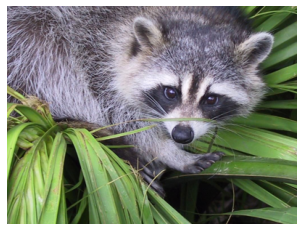

In [ ]:
show_image(img)

### 1. Basic operations on images

#### 1.1 Understand pixel and image structure

In [ ]:
# print the first pixel of the image
x = 0
y = 0
print(img[x, y])  # play along with x and y

[112 104 123]


In [ ]:
# iterate over the whole image and separate red green and blue values from it into three separate images
r_img = np.zeros(img.shape, dtype=np.int32)
g_img = np.zeros(img.shape, dtype=np.int32)
b_img = np.zeros(img.shape, dtype=np.int32)

for i in range(0, img.shape[0]):  # horizontal axis
    for j in range(0, img.shape[1]):  # vertical axis
        pixel = img[i, j]  # [R, G, B]

        r_img[i, j] = [pixel[0], 0, 0]
        g_img[i, j] = [0, pixel[1], 0]
        b_img[i, j] = [0, 0, pixel[2]]


print('Extracted RED channel:')
show_image(r_img)
print('Extracted GREEN channel:')
show_image(g_img)
print('Extracted BLUE channel:')
show_image(b_img)

RGB Color picker: https://www.rapidtables.com/web/color/color-picker.html

In [ ]:
# white - to - blue
img_1 = np.zeros((10, 10, 3), dtype=np.int32)
show_image(img_1)

# chessboard?
for i in range(0, 10):
    for j in range(0, 10):
        if (i + j) % 2 == 0:
            img_1[i, j] = [255, 255, 255]  # what color is this?
show_image(img_1)

In [ ]:
# ######
# Problem 1: we have an RGB pixel with value [35, 200, 155]. How much is the RED value?
# ######

pixel = [35, 200, 155]
solution = # YOUR CODE HERE
evaluate(problem_id='IP/basic/p1', submitted_solution=solution)

#### 1.2 Color image to Grayscale

In [ ]:
# ######
# Math:
#  s, d in R{n, n}; s[0][0] in R{3}; d[0][0] in R;
#  d|i, j in {0, n}|[i][j] = sum(s[i][j]) / count(s[i][j])
# ######
def color_to_grayscale(img: np.ndarray):
    img_grayscale = np.zeros((img.shape[0], img.shape[1]))
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            # print(np.average(img[i, j]))
            img_grayscale[i, j] = int(np.average(img[i, j]))
    return img_grayscale

In [ ]:
img_grayscale = color_to_grayscale(img)
show_image(img_grayscale)

In [ ]:
# ######
# Problem 2: we have an RGB pixel with value [120, 175, 5]. What will be the grayscale value according to our algorithm used before?
# ######

pixel = [120, 175, 4]
solution = # YOUR CODE HERE
evaluate(problem_id='IP/basic/p2', submitted_solution=solution)

### 2. Complex operations on images

#### 2.1 Conv2D

##### theory

![](https://drive.google.com/uc?export=view&id=1I-ksqhe13i04_qePM9_I8JrNw9mUCcIg)


![](https://drive.google.com/uc?export=view&id=1I3gPiYAWFPbbEKTi_L4KyVAOXZN4dUXM)


Source: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

##### code

In [ ]:
# sum(filter) = 1, so need to weight it if not!

# average smoothing
three = [[1, 1, 1], [1, 1, 1], [1, 1, 1]], 9
five = [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]], 25
gaussian = [[1, 2, 1], [2, 4, 2], [1, 2, 1]], 16

# edge enhancement
#  generic
laplace = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], 1
highpass = [[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], 1
#
sobel_vertical = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], 1
sobel_horizontal = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]], 1

In [ ]:
# ######
# Math: 
#  s, d in R{n, n}; s[0][0], d[0][0] in R;
#  d|i, j in {1, n - 1}|[i][j] = |_i, _j in {0, filter_width}|{sum|i, j in {1, n-1}|(s[i - filter_width + _i][j - filter_width + _j] * filter[_i][_j])}
# ######
def conv2d(img: np.ndarray, filter_obj: Union[list, int]):
    # check grayscale for transformation using our code
    assert isinstance(img[0, 0], np.float64)

    # copy image to a numpy array => borders!
    image_transformed = np.copy(img)

    # size of the (original) image
    size_x = image_transformed.shape[0]
    size_y = image_transformed.shape[1]

    # collect filter and weight from the composite filter_object
    filter, weight = filter_obj
    size_of_filter = len(filter[0])
    filter_width = size_of_filter // 2  # border of matrix

    # iterate over the image !! careful at boundaries
    for x in range(filter_width, size_x - filter_width):
        for y in range(filter_width, size_y - filter_width):
            convolution = 0.0
            for i in range(0, size_of_filter):
                for j in range(0, size_of_filter):
                    convolution += img[x - filter_width + i, y - filter_width + j] * filter[i][j]
            # div by weight !!
            convolution /= weight
            # bound between the boundaries of 1byte ~= grayscale
            convolution = min(255, max(0, convolution))

            image_transformed[x, y] = convolution
    return image_transformed

In [ ]:
res = conv2d(img_grayscale, sobel_vertical)
show_image(res)

res = conv2d(img_grayscale, sobel_horizontal)
show_image(res)

#### 2.2 MaxPool2D

##### theory

![](https://drive.google.com/uc?export=view&id=1IC7l4ug6v9nitk8ToiISVjz8pRrMOntq)


Source: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

##### code

In [ ]:
# ######
# Math: 
#  s  R{n, n}; s[0][0]; d in R{m, m}; d[0][0] in R;
#  d|i, j in {0, m}|[i][j] = max(|_i, _j in {0, conv_size}|{sum|i, j in {0, n, conv_size}|(s[i + _i][j + _j])})
# ######
def maxpool2d(img: np.ndarray, conv_size: int) -> np.ndarray:
    # check grayscale for transformation using our code
    assert isinstance(img[0, 0], np.float64)

    # size of the (original) image
    size_x = img.shape[0]
    size_y = img.shape[1]

    new_x = size_x // conv_size
    new_y = size_y // conv_size

    # Create blank image with reduced dimensions
    image_transformed = np.zeros((new_x, new_y))

    # Iterate over the image
    for x in range(0, size_x, conv_size):
        for y in range(0, size_y, conv_size):
            pixels = []
            for i in range(0, conv_size):
                for j in range(0, conv_size):
                    pixels.append(img[x + i, y + j])

            # Get only the largest value and assign to the reduced image
            image_transformed[x // conv_size, y // conv_size] = max(pixels)
    return image_transformed

In [ ]:
res = maxpool2d(img_grayscale, 5)  # careful, conv_size HAS TO DIVIDE shape of input image
# res = maxpool2d(img_grayscale, 8)
show_image(res)

### Commonly used IP concepts/techniques